<a href="https://colab.research.google.com/github/minininjaaa/EDA-Netflix/blob/main/EDA_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.
В данном задании нам предстоит провести визуальный анализ датасета **1000 Netflix Shows** и сделать выводы.



### Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Netflix/NetflixShows - NetflixShows.csv', encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [4]:
pd.set_option('max_colwidth', 120)
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug content",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult language",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitable for all children.,2014,94.0
...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief rude humor",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


In [5]:
# переименуем названия колонок для удобства в дальнейшей работе над датафрэймом
data = data.rename(columns = {'user rating score': 'user_rating_score', 'release year' : 'release_year'})

### Проверка на наличие дубликатов, их анализ и удаление.

In [6]:
# создадим копию таблицы, содержащую только дубликаты
duplicate_data = data[data.duplicated(keep = False)].copy()

In [7]:
# найдем группу в которой больше всего дубликатов
duplicate_data[['title', 'rating']].groupby(['rating']).count().sort_values('title', ascending = False)

,title
rating,
TV-14,186
PG,139
G,119
TV-MA,98
TV-Y,48
TV-PG,39
TV-G,37
TV-Y7-FV,30
TV-Y7,27


In [8]:
# создидим табличку с уникальными дубликатами
duplicate_uniq_data = duplicate_data[['title', 'rating']].copy().groupby(['title']).first()
duplicate_uniq_data.shape


(244, 1)

In [9]:
# и посчитаем сколько раз каждый элемент дублируется
duplicate_uniq_data['nmb_of_dupl'] = duplicate_data.title.value_counts()
duplicate_uniq_data = duplicate_uniq_data.sort_values('nmb_of_dupl', ascending = False)
duplicate_uniq_data.head(10)

,rating,nmb_of_dupl
title,,
13 Reasons Why,TV-MA,8
Prison Break,TV-14,7
Girlboss,TV-MA,7
Shameless (U.S.),TV-MA,6
New Girl,TV-14,6
Anastasia,G,6
Grace and Frankie,TV-MA,6
Pretty Little Liars,TV-14,6
Grey's Anatomy,TV-14,6


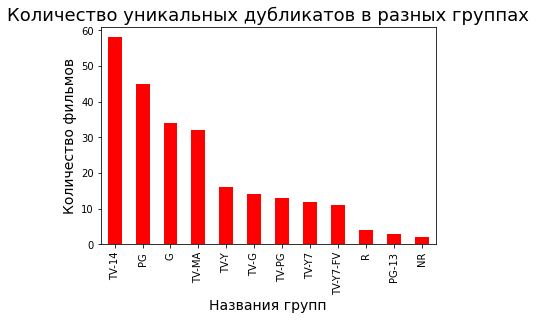

In [10]:
# и нарисуем
duplicate_uniq_data.rating.value_counts().plot(kind='bar', color = 'red')
plt.title('Количество уникальных дубликатов в разных группах', size = 18)
plt.ylabel('Количество фильмов', size = 14)
plt.xlabel('Названия групп', size = 14)
print()

In [12]:
# теперь уберем все полные дубликаты из таблички, так как они не имеют смысла
data_without_dupl = data.drop_duplicates().copy()
data_without_dupl

,title,rating,ratingLevel,release_year,user_rating_score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug content",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult language",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitable for all children.,2014,94.0
...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,2015,NaN
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


In [14]:
# в уже очищенной от дубликатов табличке есть фильмы с одинаковым названием, но они полными дубликатами не являются
pd.set_option('max_colwidth', 120)
repeats = data_without_dupl[data_without_dupl.duplicated(subset=['title'], keep = False)].sort_values(['title']).copy()
repeats

,title,rating,ratingLevel,release_year,user_rating_score
167,Bordertown,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,2016,86.0
449,Bordertown,TV-MA,For mature audiences. May not be suitable for children 17 and under.,2016,NaN
568,Goosebumps,TV-Y7,Suitable for children ages 7 and older,1998,88.0
632,Goosebumps,PG,"scary and intense creature action and images, and for some rude humor",2015,90.0
151,Skins,TV-MA,For mature audiences. May not be suitable for children 17 and under.,2013,NaN
181,Skins,TV-MA,NaN,2017,NaN
504,Star Wars: The Clone Wars,PG,"sci-fi action violence throughout, brief language and momentary smoking",2008,57.0
512,Star Wars: The Clone Wars,TV-PG,Parental guidance suggested. May not be suitable for all children.,2014,93.0


### Сколько рейтинговых групп представлено в данных?

In [15]:
# посчитаем количество уникальных названий рейтингов
print(f'Количество рейтинговых групп: {data["rating"].nunique()}')

Количество рейтинговых групп: 13


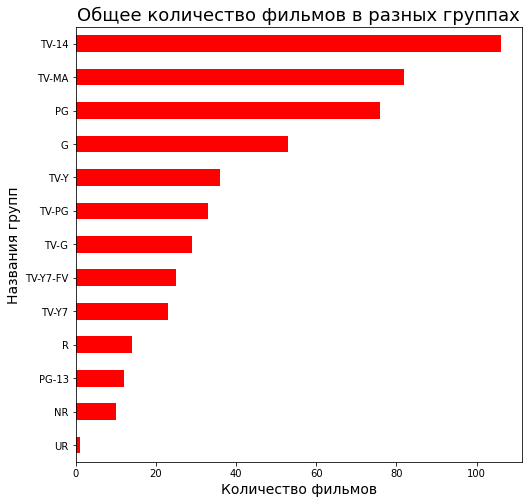

In [16]:
# и нарисуем
data_without_dupl[['title', 'rating']].groupby(['rating']).count().sort_values(['title']).plot(kind='barh', color = 'red', legend=False, figsize=(8, 8))
plt.title('Общее количество фильмов в разных группах', size = 18)
plt.xlabel('Количество фильмов', size = 14)
plt.ylabel('Названия групп', size = 14)
print()

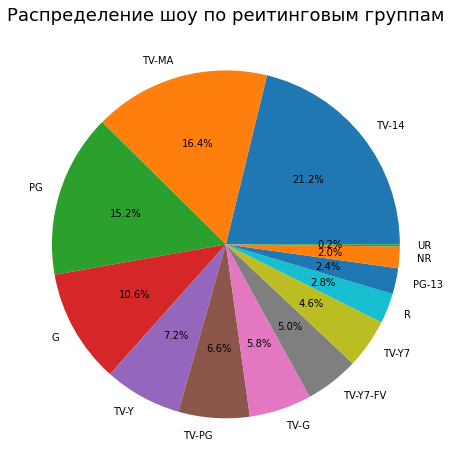

In [ ]:
plt.figure(figsize=(8, 8))
nmb_appear = data_without_dupl[['title', 'rating']].groupby(['rating']).count().sort_values(['title'], ascending = False)
plt.pie(np.array(nmb_appear).ravel(), labels = nmb_appear.index, autopct = '%1.1f%%')
plt.title('Распределение шоу по реитинговым группам', size = 18)
print()

### Какие оценки пользователи ставят чаще?


In [17]:
# посчитаем шоу без оценки
print(f'Всего неоцененных фильмов {data_without_dupl["user_rating_score"].isna().sum()} из {len(data_without_dupl["user_rating_score"])}')

Всего неоцененных фильмов 244 из 500


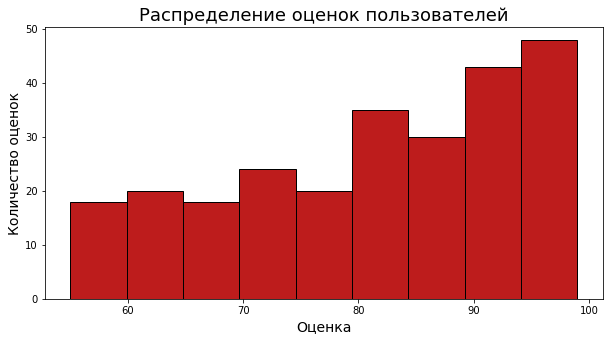

In [18]:
# посмотрим на гистограмму распределения оценок
plt.figure(figsize=(10,5))
plt.hist(data_without_dupl['user_rating_score'], bins = 'auto', color = '#BD1C1C', ec = 'black')
plt.title('Распределение оценок пользователей', size = 18)
plt.ylabel('Количество оценок', size = 14)
plt.xlabel('Оценка', size = 14)
print()

In [19]:
# разобьем оценки фильмов на 5 групп по 10 значений в каждой
d = {'51-60': 0, '61-70': 0, '71-80': 0, '81-90': 0, '91-100': 0}
for i in data_without_dupl.user_rating_score:
  if 60 >= i >=51:
    d['51-60'] +=1
  elif 70 >= i >=61:
    d['61-70'] +=1
  elif 80 >= i >=71:
    d['71-80'] +=1
  elif 90 >= i >=81:
    d['81-90'] +=1
  elif 100 >= i >=91:
    d['91-100'] +=1

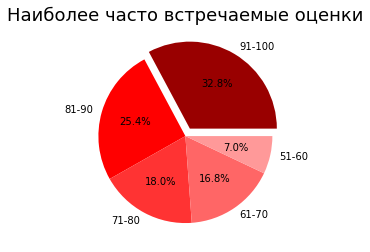

In [20]:
range_rating = pd.DataFrame([d]).transpose().rename(columns = {0: 'quantity'}).sort_index(ascending = False)
clrs = ['#990000', '#FF0000', '#FF3333', '#FF6666', '#FF9999']
plt.pie(np.array(range_rating).ravel(), labels = range_rating.index, autopct = '%1.1f%%', colors = clrs, explode = (0.1, 0.0, 0.0, 0.0, 0.0))
plt.title('Наиболее часто встречаемые оценки', size = 18)
print()

In [21]:
# информация об оценках пользователей 
print(f'Средняя оценка пользователей: {data_without_dupl["user_rating_score"].mean() : .2f}')
print(f'Медианная оценка пользователей: {data_without_dupl["user_rating_score"].median() : .2f}')
print(f'Максимальная оценка пользователей: {data_without_dupl["user_rating_score"].max() : .2f}')
print(f'Минимальная оценка пользователей: {data_without_dupl["user_rating_score"].min() : .2f}')
print(f'Стандартное отклонение: {data_without_dupl["user_rating_score"].std() : .2f}')

Средняя оценка пользователей:  81.40
Медианная оценка пользователей:  83.50
Максимальная оценка пользователей:  99.00
Минимальная оценка пользователей:  55.00
Стандартное отклонение:  12.73


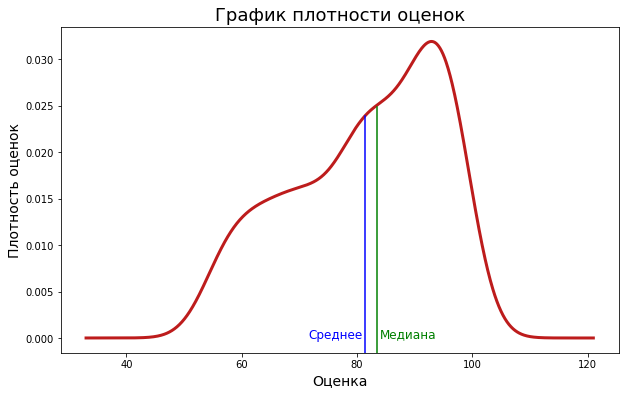

In [22]:
# нарисуем график плотности оценок
data_without_dupl['user_rating_score'].plot.kde(color = '#BD1C1C', linewidth= 3,figsize=(10, 6))
plt.ylabel('Плотность оценок', size = 14)
plt.xlabel('Оценка', size = 14)
plt.title('График плотности оценок', size = 18)
plt.axvline(x = 81.4, ymax = 0.725, color="blue", linestyle="-")
plt.axvline(x = 83.5, ymax = 0.755, color="green", linestyle="-")
plt.text(71.5, 0, 'Среднее', color="blue", fontsize=12)
plt.text(84, 0, 'Медиана', color="green", fontsize=12)
print()

### В какие годы были запущены шоу, представленные в датасете?

In [23]:
first_year = data['release_year'].min()
last_year = data['release_year'].max()
print(f'Год запуска первого шоу: {first_year}')
print(f'Год запуска последнего шоу: {last_year}')
print(f'Все годы: {data["release_year"].sort_values().unique()}')

Год запуска первого шоу: 1940
Год запуска последнего шоу: 2017
Все годы: [1940 1976 1978 1982 1986 1987 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017]


In [24]:
# построим график, показывающий распределение количества запущенных шоу в зависимости от года
year = [i for i in range(first_year, last_year+1)]
count = []
for i in year:
  c = data_without_dupl.loc[(data_without_dupl.release_year == i)].title.count()
  count.append(c)

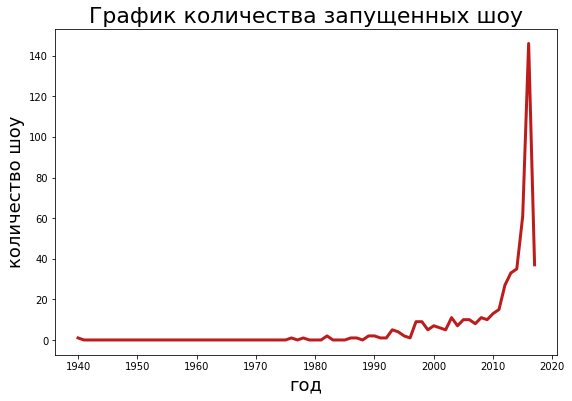

In [25]:
plt.figure(figsize=(9,6))
plt.plot(year, count, color = '#BD1C1C', linewidth= 3)
plt.title('График количества запущенных шоу', size = 22)
plt.xlabel('год', size = 18)
plt.ylabel('количество шоу', size = 18)
print()


In [26]:
# 2016 количество фильмов в 2016 году похоже на явный выброс, посмотрим на них
# но если посмотреть информацию в интернете, в этом году Netflix приобрел права на показ многих фильмов и, возможно, вместо даты релиза ошибочно указана дата появления их именно в библиотеке Netflix
data_without_dupl[(data_without_dupl.release_year == 2016)]

,title,rating,ratingLevel,release_year,user_rating_score
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,2016,98.0
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,2016,95.0
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,2016,96.0
10,Once Upon a Time,TV-PG,Parental guidance suggested. May not be suitable for all children.,2016,98.0
11,Sherlock,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,2016,95.0
...,...,...,...,...,...
794,Alpha and Omega: Dino Digs,TV-G,Suitable for all ages.,2016,NaN
796,Quackerz,PG,"rude and suggestive humor, and some action",2016,NaN
837,Puffin Rock,TV-Y,Suitable for all ages.,2016,NaN
848,LEGO Jurassic World: The Indominus Escape,TV-Y7,Suitable for children ages 7 and older,2016,NaN


### Сравнение шоу
Для интереса, сравним один из моих лубимых сериалов с остальными, представленными в датасете. 
Пусть это будет Sherlock!

In [27]:
data_without_dupl[data_without_dupl.title == 'Sherlock']

,title,rating,ratingLevel,release_year,user_rating_score
11,Sherlock,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,2016,95.0


In [ ]:
# настоящий release year 1-го сезона: 2010

In [28]:
# фильмы выборки с такой же оценкой и рейтинговой группой
data_without_dupl[(data_without_dupl.user_rating_score == 95.0) & (data_without_dupl.rating == 'TV-14') & (data_without_dupl.title != 'Sherlock')]

,title,rating,ratingLevel,release_year,user_rating_score
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,2016,95.0
79,How to Get Away with Murder,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,2016,95.0
465,Blue Bloods,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,2016,95.0


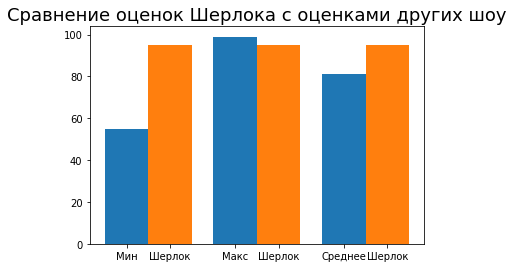

In [29]:
# сравнение оценки сериала с оценками всей выборки
x = [1, 2, 3]
y = [data_without_dupl.user_rating_score.min(), data_without_dupl.user_rating_score.max(), data_without_dupl.user_rating_score.mean()]
x2 = [i + 0.4 for i in x]
y2 = [95, 95, 95]
plt.bar(x, y,  width = 0.4)
plt.bar(x2, y2,  width = 0.4)
plt.xticks([1, 1.4, 2, 2.4, 3, 3.4], ['Мин', 'Шерлок', 'Макс', 'Шерлок', 'Среднее', 'Шерлок'])
plt.title('Сравнение оценок Шерлока с оценками других шоу', size = 18)
print()

